### TEM Beta Lactamase Analysis 002 Network Image

In [15]:
%reload_ext autoreload
%autoreload 2
import os
import sys
import py4cytoscape as p4c
from pyeed.core import ProteinInfo, Alignment
from pyeed.aligners import PairwiseAligner
from pyeed.network import SequenceNetwork
import networkx as nx
import matplotlib.pyplot as plt
from py4cytoscape import gen_node_color_map

##### reading in the files and alignments

In [6]:
n_hits = 30
e_value = 0.05
current_path = os.path.dirname(os.getcwd())
starting_protein_tem = ProteinInfo.get_id("QGC48744.1")


In [7]:
%reload_ext autoreload
%autoreload 2
# read in the saved fetched results
n_hits = 30
e_value = 0.05
name = starting_protein_tem.source_id.replace('.', '')
read_blast_folder = os.path.join(current_path, "TEM-lactamase", "data", "data_blast_search_{}_{}_{}".format(name, n_hits, int(e_value*1000)))
protein_list = []
for file in os.listdir(read_blast_folder):
    with open(os.path.join(read_blast_folder, file), "r") as f:
        protein_list.append(ProteinInfo.from_json(f))

#### Actual Network Work

In [32]:
# check if the cytocope connection is working and is valid
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [33]:
# create a network with the SequencNetwork class
network = SequenceNetwork(
    sequences=protein_list,
    weight="score",
    threshold=1.019,
    dimensions=2,
    color="taxonomy_id",
)

# Check if the graph is created
graph = network.graph
p4c.create_network_from_networkx(graph, collection="TEM-lactamase", title="Sequence Network for TEM-lactamase 002")
p4c.layout_network('force-directed')

⛓️ Running pairwise alignments: 100%|██████████| 465/465 [00:00<00:00, 11022.42it/s]


this is the threshold 1.019
1.015958845826566
Applying default style...
Applying preferred layout


{}

In [34]:
df_nodes = p4c.get_table_columns(table='node')
df_edges = p4c.get_table_columns(table='edge')
# print('DF nodes:', df_nodes.head())
# print('DF edges:', df_edges.head())

In [41]:
data_color_names = p4c.get_table_columns(columns='species', table='node')
data_color_names = list(set(data_color_names['species']))

# matplotlib has several colormaps. Here we use 'tab20', which is good for categorical data
colors = plt.cm.tab20(range(len(data_color_names)))
hex_colors = ['#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255)) for r, g, b, _ in colors]

# Convert RGB to hex colors for py4cytoscape
hex_colors = ['#' + ''.join([f'{int(c*255):02x}' for c in color[:3]]) for color in colors]

style_name = 'niklas_node_color_style'

if not (style_name in p4c.get_visual_style_names()):
    p4c.create_visual_style(style_name)

p4c.set_node_color_default('#FFFFFF', style_name)
p4c.set_node_color_mapping('species', mapping_type='discrete', default_color='#654321', style_name=style_name, table_column_values=data_color_names, colors=hex_colors)
p4c.set_visual_style(style_name)


{'message': 'Visual Style applied.'}

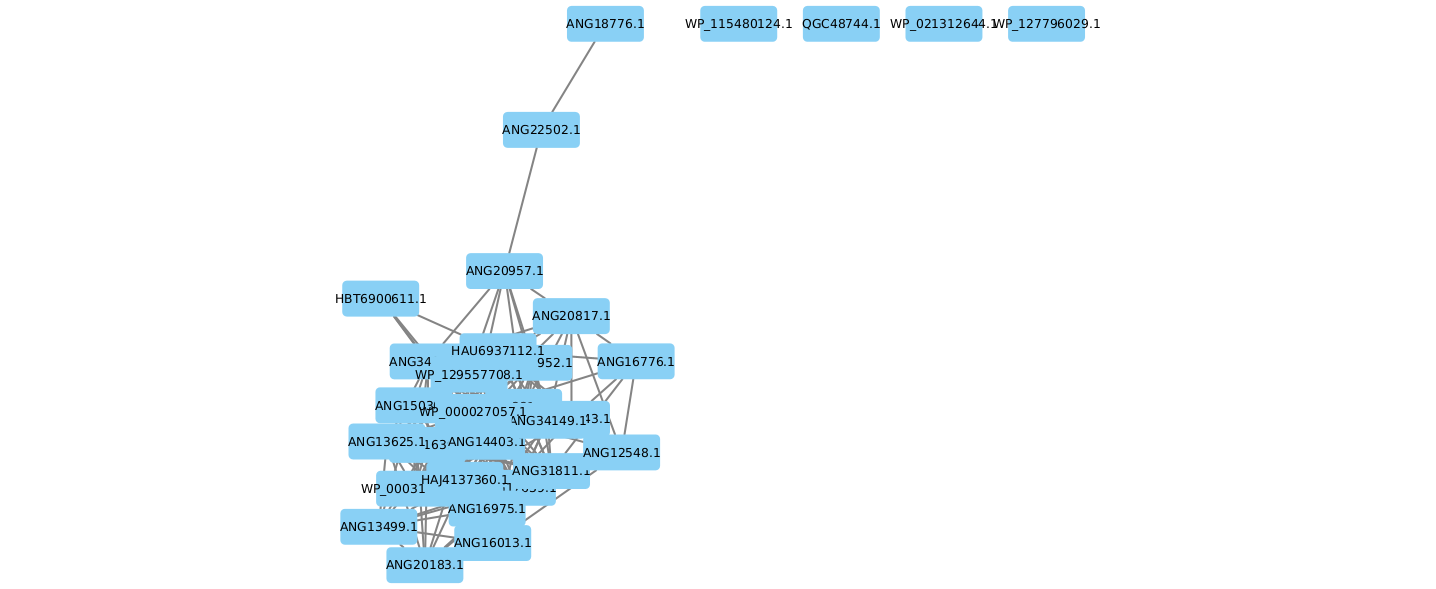

In [36]:
p4c.notebook_export_show_image()